<a href="https://colab.research.google.com/github/kimdesok/Statistical-Thinking-in-Python-Part-1-/blob/main/Stats_by_Python1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

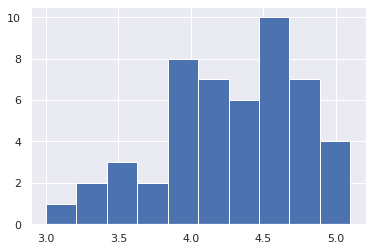

In [2]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# Set default Seaborn style
sns.set()

#Datasets
#Iris dataset consists of 150 rows and four columns.
#This data set consists of three different types of irise : Setosa, Versicolor, and Virginica.
#The first 50 rows represent data of Setoda and so on.
#source: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#sphx-glr-auto-examples-datasets-plot-iris-dataset-py
#Each column represents Sepal Length, Sepal Width, Petal Length and Petal Width.

#To extract Versicolor's petal length data
from sklearn.datasets import load_iris
versicolor_petal_length = load_iris().data[50:100,2]
#print(data)

# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length)
plt.show()

Don't forget to label the axis.

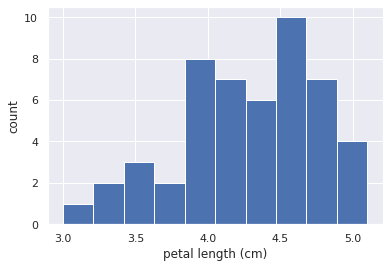

In [3]:
_ = plt.hist(versicolor_petal_length)
# Label axes
plt.ylabel('count')
plt.xlabel('petal length (cm)')

# Show histogram

plt.show()

To determine the number of bins in the histogram, you take a square root of the number of data.

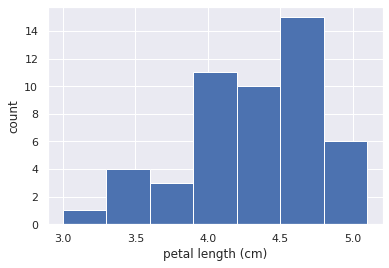

In [4]:
# Import numpy
import numpy as np

# Compute number of data points: n_data
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(bins)

# Plot the histogram
_ = plt.hist(versicolor_petal_length, bins=n_bins)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()

Binning introduces some kinds of bias.  The solution is Bee sawrm plot.

In [5]:
import pandas as pd 
df = pd.DataFrame(load_iris().data)
df.columns = ['sepal length (cm)',  'sepal width (cm)',  'petal length (cm)',  'petal width (cm)']
df_ = 50*['setosa']
df_[50:100] = 50*['versicolor']
df_[100:150] = 50*['virginica']
#print(len(df_))
df['species'] = df_


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


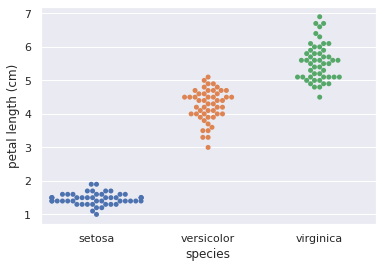

In [6]:
# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(x='species', y='petal length (cm)', data=df)

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

# Show the plot
plt.show()

The size of points may be too large so that it complaints some points are not visible.  Reduce the size to less than default size = 6

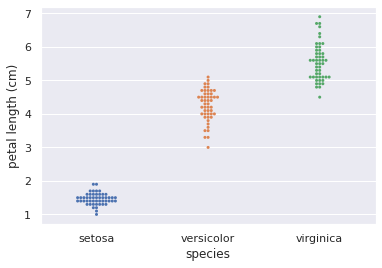

In [7]:
_ = sns.swarmplot(x='species', y='petal length (cm)', data=df, size =3)

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

# Show the plot
plt.show()


Calculating for eCDF graph: empirical distribution function

In [8]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

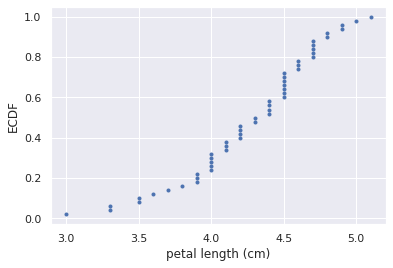

In [9]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
_ = plt.plot(x_vers, y_vers,marker = '.', linestyle = 'none')

# Label the axes

plt.xlabel('petal length (cm)')
plt.ylabel('ECDF')

# Display the plot
plt.show()